# NFL Arrests

* Arrest average per team. - Issac
* Time start vs. number of arrests. - Issac
* Week number vs. number of arrests - Mike
* Home team vs away team - Eric
* division game vs non division game - Eric
* Blowout vs. close game (Overtime is always close game) - Mike

####  Little more challenging
* Team made playoffs vs Teams that missed playoffs - Need external dataset.
* Team average vs number of arrests - Mike
* Avg win/loss by timeframe - Issac

# Important Notes:
### Teams Missing
* St. Louis
* Cleveland
* Buffalo
* Atlanta
* New Orleans
* Minnesota

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
nfl_arrests = pd.read_csv('ArrestSet.csv')

In [35]:
nfl_arrests

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,NaN,5.0,n
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,NaN,6.0,n
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,NaN,9.0,n
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,OT,6.0,y
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,OT,3.0,n
5,2011,14,Sunday,2:05:00 PM,Arizona,San Francisco,21,19,NaN,4.0,y
6,2011,15,Sunday,2:15:00 PM,Arizona,Cleveland,20,17,OT,1.0,n
7,2011,17,Sunday,2:15:00 PM,Arizona,Seattle,23,20,OT,4.0,y
8,2012,1,Sunday,1:25:00 PM,Arizona,Seattle,20,16,NaN,0.0,y
9,2012,3,Sunday,1:05:00 PM,Arizona,Philadelphia,27,6,NaN,12.0,n


In [45]:
nfl_arrests[nfl_arrests['arrests'] > 50]

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
739,2012,11,Sunday,8:20:00 PM,Pittsburgh,Baltimore,10,13,NaN,52.0,y
744,2013,3,Sunday,8:30:00 PM,Pittsburgh,Chicago,23,40,NaN,56.0,n
771,2011,10,Thursday,5:20:00 PM,San Diego,Oakland,17,24,NaN,69.0,y
782,2012,17,Sunday,1:25:00 PM,San Diego,Oakland,24,21,NaN,60.0,y


In [36]:
home_list = nfl_arrests.home_team.unique()
away_list = nfl_arrests.away_team.unique()

no_home = []
for team in away_list:
    if team not in home_list:
        no_home.append(team)

no_home

['St. Louis', 'Cleveland', 'Buffalo', 'Atlanta', 'New Orleans', 'Minnesota']

In [37]:
nfl_arrests.groupby('season').mean()

,week_num,home_score,away_score,arrests
season,,,,
2011,9.095477,23.668342,20.251256,6.214660
2012,9.140000,23.420000,21.370000,7.020833
2013,9.179612,24.859223,21.509709,6.500000
2014,9.039216,24.240196,20.906863,6.750000
2015,9.126904,23.441624,21.532995,6.338624


## Is there Coorelation with the Week Number

In [38]:
byWeek = nfl_arrests.groupby('week_num')
byWeek_mean = byWeek.mean()['arrests']
byWeek_median = byWeek.median()['arrests']
byWeek_sem = byWeek.sem()['arrests']

byWeek_summary = pd.DataFrame([byWeek_mean, byWeek_sem, byWeek_median])
byWeek_summary.reset_index(inplace=True)
byWeek_summary.drop(columns='index', inplace=True)

byWeek_summary.rename(index={0:'Mean', 1:'Standard Error', 2:'Median'}, inplace=True)
byWeek_summary

week_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Mean,6.816667,6.786885,7.568966,5.622642,6.232143,6.886792,6.716981,5.244898,7.500000,7.357143,5.730769,7.448276,6.792453,6.147059,6.385965,6.384615,5.866667
Standard Error,1.248387,1.032032,1.552492,1.118270,1.058973,1.359710,1.127689,1.039824,1.306263,1.671656,1.361260,1.513235,1.297356,1.124838,1.145372,1.152483,1.231981
Median,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000


In [39]:
# count number of weeks
week_count = len(byWeek_summary.columns)

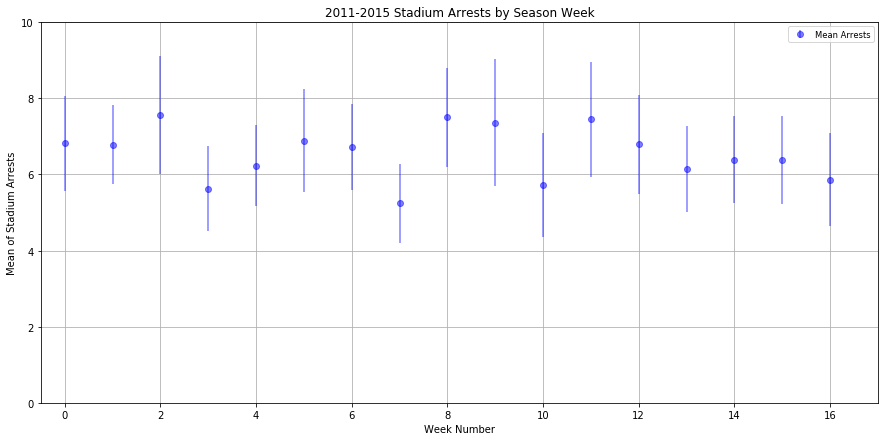

In [104]:
# Plot sample means with error bars
fig, ax = plt.subplots(figsize=(15,7))

ax.errorbar(np.arange(0, week_count), byWeek_mean, yerr=byWeek_sem, fmt="o", color="b",
            alpha=0.5, label="Mean Arrests")

ax.set_xlim(-0.5, week_count)
ax.set_ylim(0,10)

ax.set_xlabel("Week Number")
ax.set_ylabel("Mean of Stadium Arrests")
ax.set_title("2011-2015 Stadium Arrests by Season Week")

plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid()

plt.show()

## byWeek Comments:
This data set does not really show anything exciting, but well worth investigating.
* The middle of the season generally have the highest arrests (exception are week 7 and week 10). 
    ~ is it possible the highest offending teams had a bye during that week.

In [112]:
season_group = nfl_arrests.groupby(['season', 'week_num'])

season_mean_arrests = season_group.mean()['arrests'].unstack(level=0)
season_sem_arrests = season_group.sem()['arrests'].unstack(level=0)
len(season_sem_arrests)

plt.plot()
np.full((1,17), season_mean_arrests[2011].max())
np.arange(1, len(season_mean_arrests)+1)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

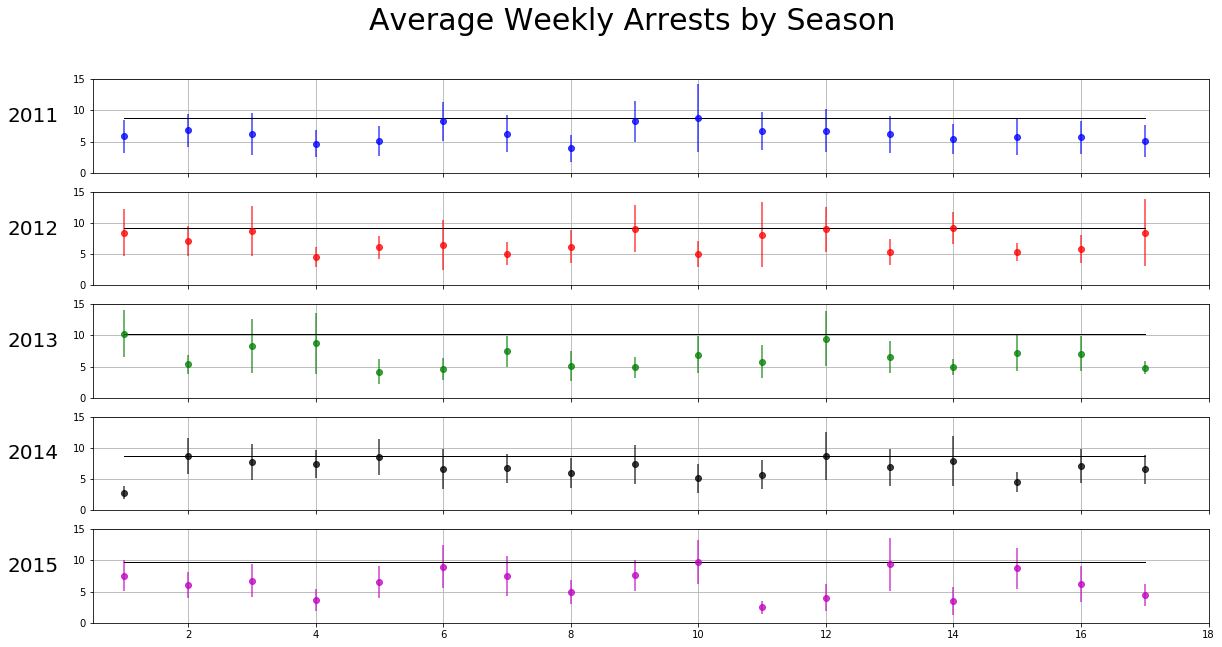

In [116]:
# Make a subplot 5 rows of plots... 
# Share the same x-axis and y_lims are the same for each

fig, axes = plt.subplots(nrows=5, ncols=1, sharex=True, figsize=(20, 10))

colors = ['b', 'r', 'g', 'k', 'm']

for row_plot in range(0,len(axes)):
    
    # current year to plot
    year = 2011 + row_plot
    
    # weeks in season
    weeks = np.arange(1, len(season_mean_arrests)+1)
    
    # plot of errorbar
    axes[row_plot].errorbar(weeks, season_mean_arrests[year],
                            yerr=season_sem_arrests[year], fmt="o", color=colors[row_plot],
                            alpha=0.75, label="Mean Arrests")
    
    # max line plot
    max_line = np.full((17,1), season_mean_arrests[year].max())
    axes[row_plot].plot(weeks,max_line, linewidth=1,color='k', alpha=1)

    # plot limits
    axes[row_plot].set_xlim(0.5, len(season_mean_arrests)+1)
    axes[row_plot].set_ylim(0,15)

#     axes[row_plot].set_xlabel("Week Number")
    axes[row_plot].set_ylabel(year, rotation=0, fontsize=20, labelpad=40)
#     axes[row_plot].set_title("2011-2015 Stadium Arrests by Season Week")

    axes[row_plot].grid()

fig.suptitle('Average Weekly Arrests by Season', fontsize=30)

plt.show()